In [17]:
!pip install lxml


[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [31]:
!pip install mecab-python3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.8/577.8 kB 7.2 MB/s eta 0:00:0000:0100:01


In [13]:
!pip install selenium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 9.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 8.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.8.0
    Uninstalling typing_extensions-4.8.0:
      Successfully uninstalled typing_extensions-4.8.0
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0

[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 11.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 9.8 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.1 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [9]:
!pip install fugashi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 616.0/616.0 kB 8.2 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [11]:
!pip install unidic-lite

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 9.6 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for unidic-lite: filename=unidic_lite-1.0.8-py3-none-any.whl size=47658837 sha256=87a0e37e93d39c973d8d10a88e2c062f8ca8d3a1bb2a85383c8ed6407b632f1c
  Stored in directory: /root/.cache/pip/wheels/8c/dd/8f/e21fc192dcd38ae31e1185ce4e66e12df4e811e3d469866e15
Successfully built unidic-lite

[notice] A new release of pip is available: 23.3 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [37]:
!pip install unidic-lite

In [1]:
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd


filename = "./RomanHoliday.csv"  # 保存するCSVファイル名
base_url = "https://eiga.com/movie/50969/review/" # ローマの休日

url_list = [base_url]
headers = {"User-Agent": "Mozilla/5.0"}

# 次のページのURL
# /all/2 から/all/10 までを追記
for i in range(2, 11):
    url_list.append(base_url+"all/"+str(i))


# 空のリストを用意
user_ids = []   # ユーザーID
ratings = []    # 評価値
titles = []     # レビューのタイトル
reviews = []    # レビュー

# 各URLについてレビューなどを取得    
for url in url_list:    
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "lxml")

    # 全てのレビュー要素を取得する
    review_elements = soup.find_all('div', class_='user-review')


    # 各レビューの情報を取得する
    for review_element in review_elements:
        # ユーザーID
        user_id = review_element['data-review-user']
        
        # 評価の数値を取得する
        rating_element = review_element.find('span', class_='rating-star')
        rating = rating_element.text if rating_element else None
    
        # レビュータイトルを取得する
        title_element = review_element.find('h2', class_='review-title')
        title = title_element.text.replace(rating, '').strip() if title_element else None
    
        # レビュー本文を取得する
        review_text_element = review_element.find('p', class_='short')
        hidden_review_text_element = review_element.find('p', class_='hidden')  # ネタバレを含むレビューを入れる場合
        if review_text_element:
            review = review_text_element.text.strip() 
        elif hidden_review_text_element:
            review = hidden_review_text_element.text.strip() 
        else:
            review = None


        # 取得した情報をリストに追加
        user_ids.append(user_id)
        ratings.append(rating)
        titles.append(title)
        reviews.append(review)

    print(f"{url}まで終了")
    time.sleep(2)


#---------------------------------------------------------------------
# csvファイルとして保存
# リストをPandasのDataFrameに変換
df = pd.DataFrame({
    'user_id'  : user_ids,
    'rating': ratings,
    'title': titles,
    'review': reviews,
})

df.to_csv(filename, index=False)


https://eiga.com/movie/50969/review/まで終了
https://eiga.com/movie/50969/review/all/2まで終了
https://eiga.com/movie/50969/review/all/3まで終了
https://eiga.com/movie/50969/review/all/4まで終了
https://eiga.com/movie/50969/review/all/5まで終了
https://eiga.com/movie/50969/review/all/6まで終了
https://eiga.com/movie/50969/review/all/7まで終了
https://eiga.com/movie/50969/review/all/8まで終了
https://eiga.com/movie/50969/review/all/9まで終了
https://eiga.com/movie/50969/review/all/10まで終了


In [2]:
df.head()

,user_id,rating,title,review
0,498613,4.5,"最後に語られる""フレンドシップ(友情)""の深い意味",ヨーロッパ歴訪の過密スケジュールに辟易した某国王女アンが、こっそりとローマの街へ飛び出して、...
1,1221593,5.0,アービング、空気読んでくれてありがとう,劇場で観るのは初めてでしたが、やはり胸がいっぱいになる素晴らしい作品。真実の口、ダンスパーテ...
2,956100,5.0,劇場での鑑賞は約40年ぶりになります とても思い出の深い作品なので...,劇場での鑑賞は約40年ぶりになりますとても思い出の深い作品なのでまたスクリーンで観れてとても...
3,927905,4.5,名作と呼ばれるに相応しい！！,初っ端の、｢thank you♡｣と一人一人にご挨拶をするシーンでもう既に心奪われる。｢足痛...
4,1223608,4.0,身分を隠した一抹の恋路,オードリー・ヘプバーンのドキュメンタリーみたので、未鑑賞のものを。不朽の名作ですね～彼女のド...


# ライブラリのインポート

In [32]:
import torch
from transformers import pipeline, AutoModelForSequenceClassification, AutoTokenizer
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import MeCab


# 感情分析の実装

In [12]:
# 事前学習済みの日本語感情分析モデルとそのトークナイザをロード
model = AutoModelForSequenceClassification.from_pretrained('christian-phu/bert-finetuned-japanese-sentiment')
tokenizer = AutoTokenizer.from_pretrained('christian-phu/bert-finetuned-japanese-sentiment', model_max_lentgh=512)

# 感情分析のためのパイプラインを設定
nlp = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer, truncation=True)


In [14]:
def make_nega_posi(text:str, model, tokenizer):
    """
    ネガティブかポジティブか
    """
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors='pt', max_length=512)
    outputs = model(**inputs)
    logits = outputs.logits

    # ロジットを確率に変換
    probabilities = torch.softmax(logits, dim=1)[0]

    # 最も高い確率の感情ラベルを取得
    sentiment_label = model.config.id2label[torch.argmax(probabilities).item()]
    return sentiment_label

In [13]:
# 分析対象となるテキストのリスト
texts = ['給料が高くて満足しています。', '給料低すぎるだろ！', '可もなく不可もなく']

# 各テキストに対して感情分析を実行
for text in texts:
    print('*'*50)
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors='pt', max_length=512)
    outputs = model(**inputs)
    logits = outputs.logits

    # ロジットを確率に変換
    probabilities = torch.softmax(logits, dim=1)[0]

    # 最も高い確率の感情ラベルを取得
    sentiment_label = model.config.id2label[torch.argmax(probabilities).item()]

    print('テキスト：{}'.format(text))
    print('感情：{}'.format(sentiment_label))


    # positiveまたはnegativeの場合はその確率を表示、neutralの場合はpositiveとnegativeの最大値を表示
    if ((sentiment_label == 'positive') or (sentiment_label == 'negative')):  
        print('感情スコア：{}'.format(max(probabilities)))
    else:
        print('感情スコア：{}'.format(max(probabilities[0], probabilities[2])))

**************************************************
テキスト：給料が高くて満足しています。
感情：positive
感情スコア：0.9992052912712097
**************************************************
テキスト：給料低すぎるだろ！
感情：negative
感情スコア：0.9936193823814392
**************************************************
テキスト：可もなく不可もなく
感情：neutral
感情スコア：0.0014821902150288224


In [16]:
df["nega_posi"] = df["review"].apply(lambda text: make_nega_posi(text, model, tokenizer))

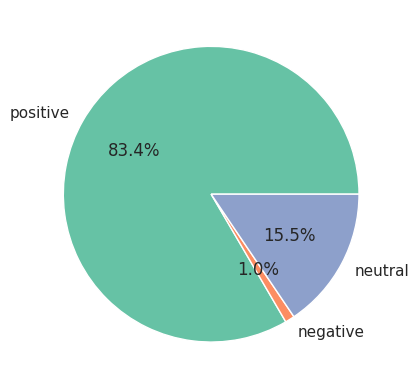

In [25]:
# グラフ化
plt.style.use('default')
sns.set()
sns.set_style('whitegrid')
sns.set_palette('Set2')

x = ["positive", "negative", "neutral"]
y = [len(df[df["nega_posi"] == "positive"]),len(df[df["nega_posi"] == "negative"]),len(df[df["nega_posi"] == "neutral"]),]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.pie(y, labels=x, autopct="%1.1f%%")

plt.show()
# セグメントごとに見るのはあり。

# キーワード抽出

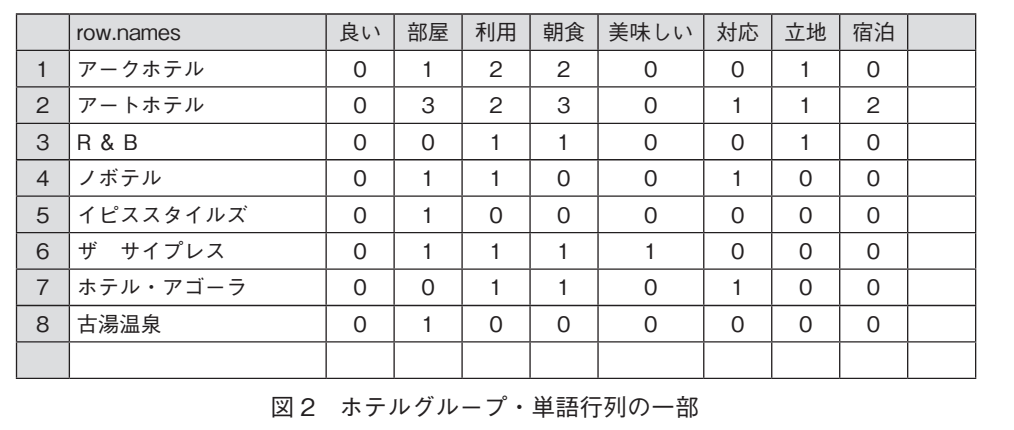

In [35]:
df["review"][0]

'ヨーロッパ歴訪の過密スケジュールに辟易した某国王女アンが、こっそりとローマの街へ飛び出して、新聞記者のジョーと恋に落ちる。宮殿で主治医から投与された鎮静剤が効いてきて街角で寝こけてしまったアンを、偶然ジョーが助けたのが馴れ初めだが、当然、真実を隠したいアンと、彼女が王女と知って特ダネにしたいジョーは、互いに身分を偽ったままローマを探訪するうちに、気がつくと惹かれ合っていたというわけだ。かなり強引な展開だが、観客は少しも不自然さを感じない。ウィリアム・ワイラーの流麗な演出と、モノクロ画面に映し出されるローマの風景と、何よりも、王女の心の変化を自然体で演じるオードリー・ヘプバーンの瑞々しさが物語を引っ張っていってくれるからだ。しかし、脚本の妙こそが称えられるべきかもしれない。製作当時、ハリウッドに吹き荒れた"赤狩り"の煽りを受けて、仕事を干されたドルトン・トランボが、、本名を隠して綴った「ローマの休日」の脚本には、同じ仲間でありながら分断された映画人の心の叫びが、永遠の友情を密かに誓い合うアンとジョーを通して浮かび上がってくるからだ。終幕間際まで上質のラブロマンスとして推移する映画が、"フレンドシップ(友情)"という言葉で締め括られることの意味を、再見の際には是非感じ取って頂きたい。'

In [46]:
# all_contact_textに対してMeCabで形態素解析
mecab = MeCab.Tagger ("-Ochasen") #辞書の読み込み
node = mecab.parseToNode(df["review"][0])

word_arr=[]
while node:
    hinshi = node.feature.split(",")[0]
    if hinshi in ["名詞","形容詞","動詞"]: # 文脈を読みたいので形容詞と動詞も抽出対象に
        origin = node.feature.split(",")[6]
        word_arr.append(origin)
    node = node.next


# 「*」を削除
word_arr_except_trash = []
not_trash_num = [i for i in range(len(word_arr)) if word_arr[i] != "*"]
for i  in not_trash_num:
    word_arr_except_trash.append(word_arr[i])

RuntimeError: 
----------------------------------------------------------

Failed initializing MeCab. Please see the README for possible solutions:

    https://github.com/SamuraiT/mecab-python3#common-issues

If you are still having trouble, please file an issue here, and include the
ERROR DETAILS below:

    https://github.com/SamuraiT/mecab-python3/issues

issueを英語で書く必要はありません。

------------------- ERROR DETAILS ------------------------
arguments: -Ochasen
default dictionary path: /usr/local/lib/python3.8/site-packages/unidic_lite/dicdir
 [!tmp.empty()] unknown format type [chasen]
----------------------------------------------------------


In [43]:
# all_contact_textに対してMeCabで形態素解析
mecab = MeCab.Tagger ("-Owakati") #辞書の読み込み
node = mecab.parseToNode(df["review"][0])

word_arr=[]
while node:
    hinshi = node.feature.split(",")[0]
    if hinshi in ["名詞","形容詞","動詞"]: # 文脈を読みたいので形容詞と動詞も抽出対象に
        origin = node.feature.split(",")[6]
        word_arr.append(origin)
    node = node.next


# 「*」を削除
word_arr_except_trash = []
not_trash_num = [i for i in range(len(word_arr)) if word_arr[i] != "*"]
for i  in not_trash_num:
    word_arr_except_trash.append(word_arr[i])

# ２つの形態素で区切る場合
join_word_arr = []
for i in range(len(word_arr_except_trash)-1):
    join_word = word_arr_except_trash[i] + "/" +word_arr_except_trash[i+1]
    join_word_arr.append(join_word)

# 3つの形態素で区切る場合
# join_word_arr = []
# for i in range(len(word_arr_except_trash)-2):
#     join_word = word_arr_except_trash[i] + "/" +word_arr_except_trash[i+1]+"/"+word_arr_except_trash[i+2]
#     join_word_arr.append(join_word)

# 4つの形態素で区切る場合
# join_word_arr = []
# for i in range(len(word_arr_except_trash)-3):
#     join_word = word_arr_except_trash[i] + "/" +word_arr_except_trash[i+1]+"/"+word_arr_except_trash[i+2]+"/"+word_arr_except_trash[i+3]
#     join_word_arr.append(join_word)

#単語の数をカウント
import collections
c = collections.Counter(join_word_arr)
print(c.most_common(50))

[('アン/ジョー', 2), ('スル/エイガ', 2), ('ヨーロッパ/レキホウ', 1), ('レキホウ/カミツ', 1), ('カミツ/スケジュール', 1), ('スケジュール/ヘキエキ', 1), ('ヘキエキ/スル', 1), ('スル/ボウコク', 1), ('ボウコク/オウジョ', 1), ('オウジョ/アン', 1), ('アン/ローマ', 1), ('ローマ/マチ', 1), ('マチ/トビダス', 1), ('トビダス/シンブン', 1), ('シンブン/キシャ', 1), ('キシャ/ジョー', 1), ('ジョー/コイ', 1), ('コイ/オチル', 1), ('オチル/キュウデン', 1), ('キュウデン/シュジ', 1), ('シュジ/トウヨ', 1), ('トウヨ/スル', 1), ('スル/チンセイ', 1), ('チンセイ/キク', 1), ('キク/クル', 1), ('クル/マチカド', 1), ('マチカド/ネコケル', 1), ('ネコケル/シマウ', 1), ('シマウ/アン', 1), ('ジョー/タスケル', 1), ('タスケル/ナレソメ', 1), ('ナレソメ/シンジツ', 1), ('シンジツ/カクス', 1), ('カクス/アン', 1), ('アン/オウジョ', 1), ('オウジョ/シル', 1), ('シル/トクダネ', 1), ('トクダネ/スル', 1), ('スル/ジョー', 1), ('ジョー/タガイ', 1), ('タガイ/ミブン', 1), ('ミブン/イツワル', 1), ('イツワル/ママ', 1), ('ママ/ローマ', 1), ('ローマ/タンボウ', 1), ('タンボウ/スル', 1), ('スル/ウチ', 1), ('ウチ/キ', 1), ('キ/ツク', 1), ('ツク/ヒク', 1)]
